In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Delta_l = ['2$\\Delta$', '4$\\Delta$', '8$\\Delta$', '16$\\Delta$', '32$\\Delta$', '64$\\Delta$']
Delta_n = np.array([40, 80, 160, 320, 640, 1280])
og_grid = 20
arr = np.arange(Delta_n[0], Delta_n[-1], 40)

In [3]:
Cs_sq_cond = np.load('Cs_sq_cond.npy')
Cth_sq_cond = np.load('Cth_sq_cond.npy')
Cqt_sq_cond = np.load('Cqt_sq_cond.npy')

In [4]:
type(Cs_sq_cond)

numpy.ndarray

In [5]:
def get_Cs(Cs_sq):
    """ calculates C_s from C_s^2 by setting neg values to zero
    and sq rooting"""

    Cs_sq_copy = Cs_sq.copy()
    Cs_sq_copy[Cs_sq < 0] = 0
    Cs = np.sqrt(Cs_sq_copy)

    return Cs

In [6]:
z_cl_r = [49, 73]
z_ml_r = [10, 22]

def cal_max_Cs(C_list):

    print('when calc the max values, shape of C list is ', np.shape(C_list))

    max_C = np.zeros((np.shape(C_list)[0]+1, np.shape(C_list)[1]-1))

    for i in range(np.shape(C_list)[0]):
        for nD in range(np.shape(C_list)[1]-1):
            if i == 0:
                max_C[i, nD] = np.max(C_list[i, nD+1, z_ml_r[0]:z_ml_r[1]])
                max_C[i+1, nD] = np.max(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])
            else:
                max_C[i+1, nD] = np.max(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])

    print('shape of max C is ', np.shape(max_C))
    return max_C

max_Cs_sq_cond = cal_max_Cs(Cs_sq_cond)
max_Cth_sq_cond = cal_max_Cs(Cth_sq_cond)
max_Cqt_sq_cond = cal_max_Cs(Cqt_sq_cond)

max_Cs_cond = get_Cs(max_Cs_sq_cond)
max_Cth_cond = get_Cs(max_Cth_sq_cond)
max_Cqt_cond = get_Cs(max_Cqt_sq_cond)


def cal_mean_Cs(C_list):

    print('when calc the mean values, shape of C list is ', np.shape(C_list))

    mean_C = np.zeros((np.shape(C_list)[0]+1, np.shape(C_list)[1]-1))

    for i in range(np.shape(C_list)[0]):
        for nD in range(np.shape(C_list)[1]-1):
            if i == 0:
                mean_C[i, nD] = np.mean(C_list[i, nD+1, z_ml_r[0]:z_ml_r[1]])
                mean_C[i+1, nD] = np.mean(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])
            else:
                mean_C[i+1, nD] = np.mean(C_list[i, nD+1, z_cl_r[0]:z_cl_r[1]])

    print('shape of mean C is ', np.shape(mean_C))
    return mean_C

mean_Cs_sq_cond = cal_mean_Cs(Cs_sq_cond)
mean_Cth_sq_cond = cal_mean_Cs(Cth_sq_cond)
mean_Cqt_sq_cond = cal_mean_Cs(Cqt_sq_cond)

mean_Cs_cond = get_Cs(mean_Cs_sq_cond)
mean_Cth_cond = get_Cs(mean_Cth_sq_cond)
mean_Cqt_cond = get_Cs(mean_Cqt_sq_cond)

when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)
when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)
when calc the max values, shape of C list is  (5, 7, 151)
shape of max C is  (6, 6)
when calc the mean values, shape of C list is  (5, 7, 151)
shape of mean C is  (6, 6)
when calc the mean values, shape of C list is  (5, 7, 151)
shape of mean C is  (6, 6)
when calc the mean values, shape of C list is  (5, 7, 151)
shape of mean C is  (6, 6)


<ipython-input-5-962d8e0bb301>:6: RuntimeWarning: invalid value encountered in less
  Cs_sq_copy[Cs_sq < 0] = 0


In [27]:
def plot_max_C_l_vs_Delta(Cs_max_in, Cth_max_in, Cqt_max_in, Delta_numbers, grid_space, y_ax, rel_Cs, rel_Cth, rel_Cqt, fn_in):

    my_lines = ['solid', 'solid', 'dotted', 'dashed', 'dashed', 'dashed']
    labels = ['ML domain', 'CL domain', 'CL: clear sky', 'in-cloud', 'cloudy updraft', 'cloud core']

    colours = ['k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
               'tab:cyan', 'tab:gray', 'tab:brown', 'tab:olive', 'tab:pink']

    fn = str(fn_in['fn'])
    A_s = str(fn_in['A_s'])
    B_s = str(fn_in['B_s'])
    A_th = str(fn_in['A_th'])
    B_th = str(fn_in['B_th'])
    A_qt = str(fn_in['A_qt'])
    B_qt = fn_in['B_qt']

    delta_labels = ['2$\\Delta$', '4$\\Delta$', '8$\\Delta$',
                          '16$\\Delta$', '32$\\Delta$', '64$\\Delta$']

    if y_ax == 'C':
        y_labels = ['$C_{s}$', '$C_{\\theta}$', '$C_{qt}$']
    else:
        y_labels = ['$l_{s}$ (m)', '$l_{\\theta}$ (m)', '$l_{qt}$ (m)']

    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
    fig.tight_layout(pad=0.5)

    for it in range(np.shape(Cs_max_in)[0]):
        ax[0].plot(Delta_numbers, Cs_max_in[it,...], color=colours[it], linestyle=my_lines[it], label=labels[it])
        ax[1].plot(Delta_numbers, Cth_max_in[it,...], color=colours[it], linestyle=my_lines[it], label=labels[it])
        ax[2].plot(Delta_numbers, Cqt_max_in[it,...], color=colours[it], linestyle=my_lines[it], label=labels[it])
    if rel_Cs !=None:
        ax[0].plot(arr, rel_Cs, 'k*')
        ax[1].plot(arr, rel_Cth, 'k*')
        ax[2].plot(arr, rel_Cqt, 'k*')

        ax[0].text(20*(2**3.5), 0.14, fn, fontsize=14, wrap=True)
        ax[0].text(20*(2**4.65), 0.10, f'{A_s}', fontsize=14, wrap=True)
        ax[0].text(20*(2**4.65), 0.088, f'{B_s}', fontsize=14, wrap=True)

        ax[1].text(20*(2**4.65), 0.10, f'{A_th}', fontsize=14, wrap=True)
        ax[1].text(20*(2**4.65), 0.088, f'{B_th}', fontsize=14, wrap=True)


        ax[2].text(20*(2**4.65), 0.10, f'{A_qt}', fontsize=14, wrap=True)
        ax[2].text(20*(2**4.65), 0.088, f'{B_qt}', fontsize=14, wrap=False)

    ax[0].set_xscale('log', basex=2) #basex
    ax[1].set_xscale('log', basex=2)
    ax[2].set_xscale('log', basex=2)



    if y_ax == 'C':
        ax[2].legend(fontsize=13, loc='upper right')
    else:
        ax[1].legend(fontsize=13, loc='best')

    bottom0, top0 = ax[0].set_ylim()
    bottom1, top1 = ax[1].set_ylim()
    bottom2, top2 = ax[2].set_ylim()

    set_top = max(top0, top1, top2)

    ax[0].set_ylim(top=set_top) #+0.1)
    ax[1].set_ylim(top=set_top) #+0.1)
    ax[2].set_ylim(top=set_top) #+0.1)
    #
    # ax[0].set_xlim(left=1)
    # ax[1].set_xlim(left=1)
    # ax[2].set_xlim(left=1)

    if y_ax == 'C':
        ax[0].set_ylabel('Smagorinsky Parameter', fontsize=14)
    else:
        ax[0].set_ylabel('Mixing Length', fontsize=14)

    ax[0].set_title(y_labels[0], fontsize=16)
    ax[1].set_title(y_labels[1], fontsize=16)
    ax[2].set_title(y_labels[2], fontsize=16)

    ax[0].set_xticks(Delta_numbers)#, delta_labels)
    ax[1].set_xticks(Delta_numbers)#, delta_labels)
    ax[2].set_xticks(Delta_numbers)#, delta_labels)

    ax[0].set_xticklabels(delta_labels)
    ax[1].set_xticklabels(delta_labels)
    ax[2].set_xticklabels(delta_labels)


    ax[1].set_xlabel('Filter scale $\\widehat{\\bar{\\Delta}}$', fontsize=14)

    plt.savefig(f'mean_C_0_log_xaxis.png', bbox_inches='tight')
    plt.show()


In [28]:
def lin_log_rel(A, B, D):
    C = A - B * np.log2(D)
    return C

In [29]:
l_rel_Cs = None #lin_log_rel(0.13, 0.02, arr/og_grid)
l_rel_Cth = None #lin_log_rel(0.16, 0.027, arr/og_grid)
l_rel_Cqt = None #lin_log_rel(0.19, 0.03, arr/og_grid)

fn_l = {
    'fn': '$C = A - B$ $log_2( \\widehat{\\bar{\\Delta}} / \\bar{\\Delta}  )$',
    'A_s': 'A = 0.13',
    'B_s': 'B = 0.02',
    'A_th': 'A = 0.16',
    'B_th': 'B = 0.027',
    'A_qt': 'A = 0.19',
    'B_qt': 'B = 0.03'
          }

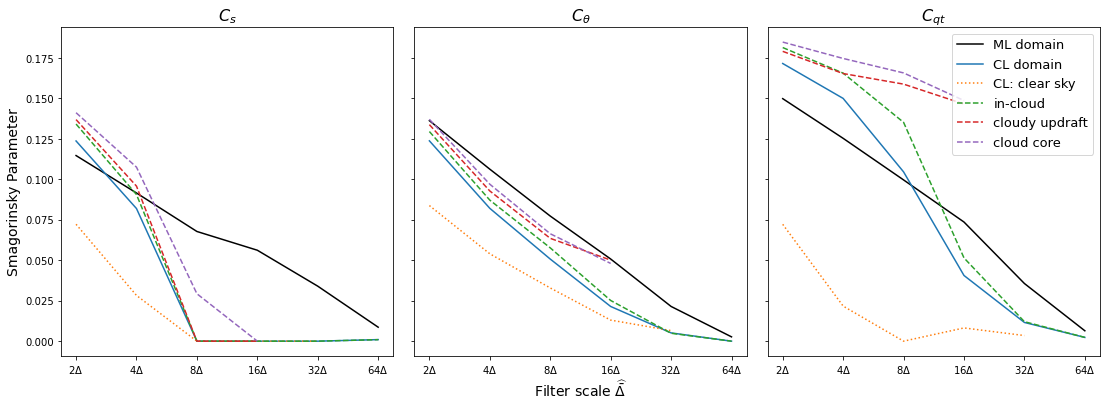

In [30]:
plot_max_C_l_vs_Delta(mean_Cs_cond, mean_Cth_cond, mean_Cqt_cond, Delta_n, og_grid, 'C', l_rel_Cs, l_rel_Cth, l_rel_Cqt, fn_l)

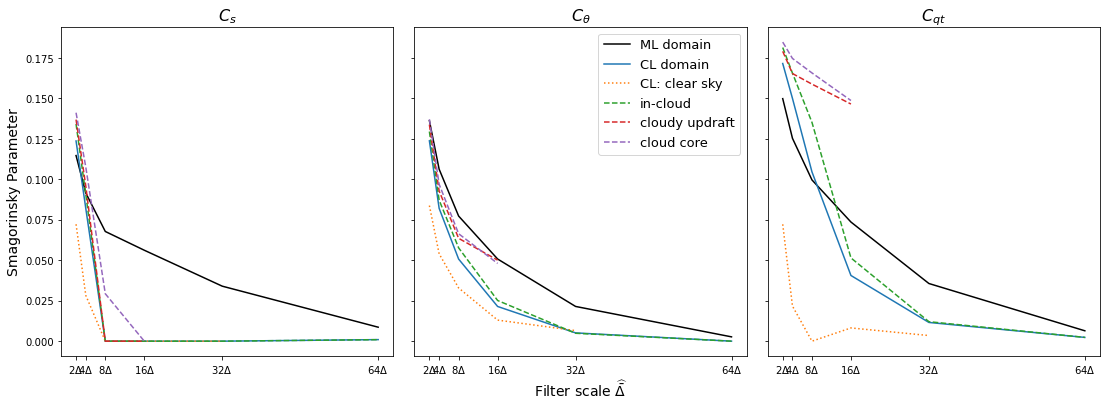

In [11]:
plot_max_C_l_vs_Delta(mean_Cs_cond, mean_Cth_cond, mean_Cqt_cond, Delta_n, og_grid, 'C', l_rel_Cs, l_rel_Cth, l_rel_Cqt, fn_l)

In [12]:
def kealy_tanh(C0, beta, D):
    C = C0 - C0 * np.tanh( beta * D )
    return C

In [13]:
kt_rel_Cs = kealy_tanh(0.11, 0.025, arr/og_grid)
kt_rel_Cth = kealy_tanh(0.1, 0.025, arr/og_grid)
kt_rel_Cqt = kealy_tanh(0.15, 0.027, arr/og_grid)

fn_kt = {
    'fn': '$C = C_0 - C_0 $ $tanh ( \\beta \\widehat{\\bar{\\Delta}} / \\bar{\\Delta}  )$',
    'A_s': '$C_0$ = 0.11',
    'B_s': '$\\beta$ = 0.025',
    'A_th': '$C_0$ = 0.1',
    'B_th': '$\\beta$ = 0.025',
    'A_qt': '$C_0$ = 0.15',
    'B_qt': '$\\beta$ = 0.027',
    'idk' : 'idk'
          }

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

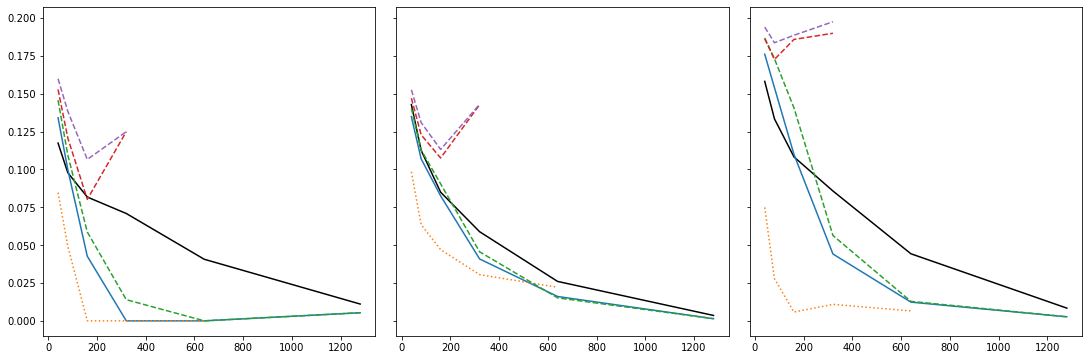

In [14]:
plot_max_C_l_vs_Delta(max_Cs_cond, max_Cth_cond, max_Cqt_cond, Delta_n, og_grid, 'C', kt_rel_Cs, kt_rel_Cth, kt_rel_Cqt, fn_kt)

In [ ]:
plot_max_C_l_vs_Delta(mean_Cs_cond, mean_Cth_cond, mean_Cqt_cond, Delta_n, og_grid, 'C', kt_rel_Cs, kt_rel_Cth, kt_rel_Cqt, fn_kt)